In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cmct-crop-disease/CCMT Dataset/test/Cassava_green mite/green mite948_.jpg
/kaggle/input/cmct-crop-disease/CCMT Dataset/test/Cassava_green mite/green mite837_.jpg
/kaggle/input/cmct-crop-disease/CCMT Dataset/test/Cassava_green mite/green mite851_.jpg
/kaggle/input/cmct-crop-disease/CCMT Dataset/test/Cassava_green mite/green mite926_.jpg
/kaggle/input/cmct-crop-disease/CCMT Dataset/test/Cassava_green mite/green mite835_.jpg
/kaggle/input/cmct-crop-disease/CCMT Dataset/test/Cassava_green mite/green mite81_.jpg
/kaggle/input/cmct-crop-disease/CCMT Dataset/test/Cassava_green mite/green mite953_.jpg
/kaggle/input/cmct-crop-disease/CCMT Dataset/test/Cassava_green mite/green mite889_.jpg
/kaggle/input/cmct-crop-disease/CCMT Dataset/test/Cassava_green mite/green mite899_.jpg
/kaggle/input/cmct-crop-disease/CCMT Dataset/test/Cassava_green mite/green mite995_.jpg
/kaggle/input/cmct-crop-disease/CCMT Dataset/test/Cassava_green mite/green mite966_.jpg
/kaggle/input/cmct-crop-disease/C

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers,callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/cmct-crop-disease/CCMT Dataset/train',
    target_size=(400,400),
    batch_size=128,
    color_mode='rgb',
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/cmct-crop-disease/CCMT Dataset/test',
    target_size=(400,400),
    batch_size=128,
    color_mode='rgb',
    class_mode='sparse'
)



2024-04-10 10:41:16.681614: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 10:41:16.681749: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 10:41:16.816535: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 20150 images belonging to 22 classes.
Found 5020 images belonging to 22 classes.


In [3]:
from keras.applications import VGG16

baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=layers.Input(shape=(400, 400, 3)))


headModel = baseModel.output
headModel = layers.AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = layers.Flatten(name="flatten")(headModel)
headModel = layers.Dense(64, activation="relu")(headModel)
headModel = layers.Dropout(0.5)(headModel)
headModel = layers.Dense(22, activation="softmax")(headModel)  

model = keras.Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  
    metrics=['accuracy'],
)
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 400, 400, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 400, 400, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 400, 400, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 200, 200, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 200, 200, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 200, 200, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 100, 100, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 100, 100, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 100, 100, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 100, 100, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 50, 50, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 50, 50, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 50, 50, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 50, 50, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 25, 25, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 3, 3, 512)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 22)             │         1,430 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 15,011,094 (57.26 MB)

 Trainable params: 296,406 (1.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-04-10 10:42:23.563155: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng15{k5=1,k6=0,k7=1,k10=1} for conv (f32[128,64,400,400]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,3,400,400]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-04-10 10:42:31.764380: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 70399: 2.75913, ex

 32/158 ━━━━━━━━━━━━━━━━━━━━ 9:23 4s/step - accuracy: 0.0988 - loss: 3.0837

2024-04-10 10:47:30.585964: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng15{k5=1,k6=0,k7=1,k10=1} for conv (f32[54,64,400,400]{3,2,1,0}, u8[0]{0}) custom-call(f32[54,3,400,400]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-04-10 10:47:33.414913: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 6.03117, expected 5.27329
2024-04-10 10:47:33.414975: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 6.40272, expected 5.64484
2024-04-10 10:47:33.414990: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.11387, expected 5.35599
2024-04-10 10:47:33.415000: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] D

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1939 - loss: 2.7039

2024-04-10 10:58:40.666301: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng15{k5=1,k6=0,k7=1,k10=1} for conv (f32[28,64,400,400]{3,2,1,0}, u8[0]{0}) custom-call(f32[28,3,400,400]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-04-10 10:58:41.651336: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 160000: 4.57116, expected 3.91209
2024-04-10 10:58:41.651399: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 160003: 5.52963, expected 4.87056
2024-04-10 10:58:41.651409: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 160007: 3.86549, expected 3.20641
2024-04-10 10:58:41.651417: E external/local_xla/xla/service/gpu/buffer_compar

158/158 ━━━━━━━━━━━━━━━━━━━━ 1063s 5s/step - accuracy: 0.1943 - loss: 2.7020 - val_accuracy: 0.4845 - val_loss: 1.6954
Epoch 2/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 692s 4s/step - accuracy: 0.3751 - loss: 1.9442 - val_accuracy: 0.5554 - val_loss: 1.4051
Epoch 3/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 681s 4s/step - accuracy: 0.4317 - loss: 1.7213 - val_accuracy: 0.5869 - val_loss: 1.2679
Epoch 4/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 681s 4s/step - accuracy: 0.4628 - loss: 1.5870 - val_accuracy: 0.6165 - val_loss: 1.1570
Epoch 5/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 684s 4s/step - accuracy: 0.4831 - loss: 1.5235 - val_accuracy: 0.6235 - val_loss: 1.1042
Epoch 6/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 756s 4s/step - accuracy: 0.4930 - loss: 1.4713 - val_accuracy: 0.6277 - val_loss: 1.0743
Epoch 7/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 698s 4s/step - accuracy: 0.5058 - loss: 1.4367 - val_accuracy: 0.6305 - val_loss: 1.0597
Epoch 8/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 699s 4s/step - accuracy: 0.5129 - loss: 1.3979 - val_accuracy: 0.63

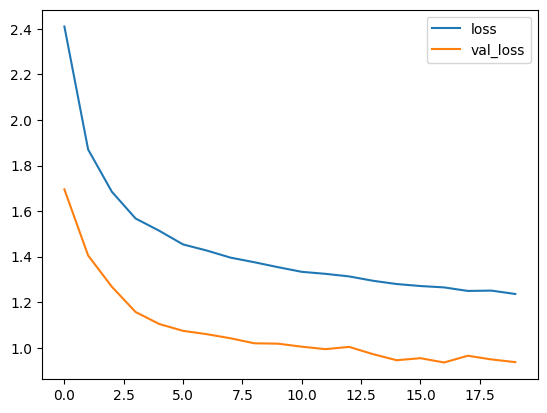

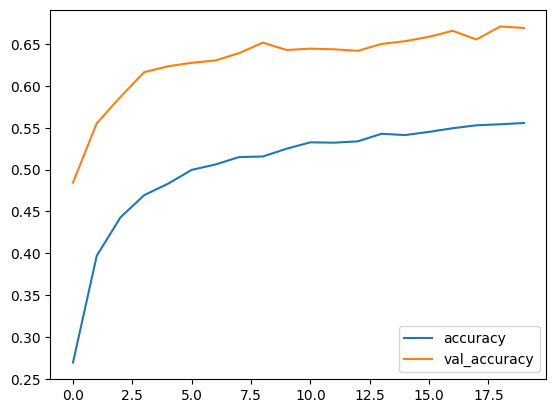

In [4]:
history = model.fit(train_generator,epochs=20,validation_data=test_generator)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()
model.save('model.h5')